# Лабораторна робота №3 ІАД

<b>Тема:</b>   Регресійний аналіз<br>
<b>Мета:</b> Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.<br>
<b>Виконала:</b> студентка МІТ-31, Панченко Владислава

<b>Завдання:</b>
- Створити набір даних за допомогою DatasetGenerator.
- Завантажити набір даних для класифікації з сайту Kaggle. Кожен студент має обрати унікальний набір даних.
(Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).
- Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.
- Викласти результати на GitHub у власний репозиторій в основну гілку в папці Lab3.


Середньоквадратична похибка (MSE): 100.53797789989598
Середня абсолютна похибка (MAE): 7.963332882397926
Коефіцієнт детермінації (R^2): 0.037456852655493256


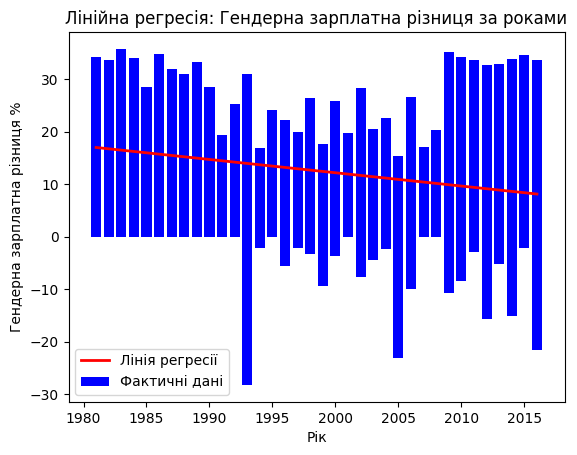

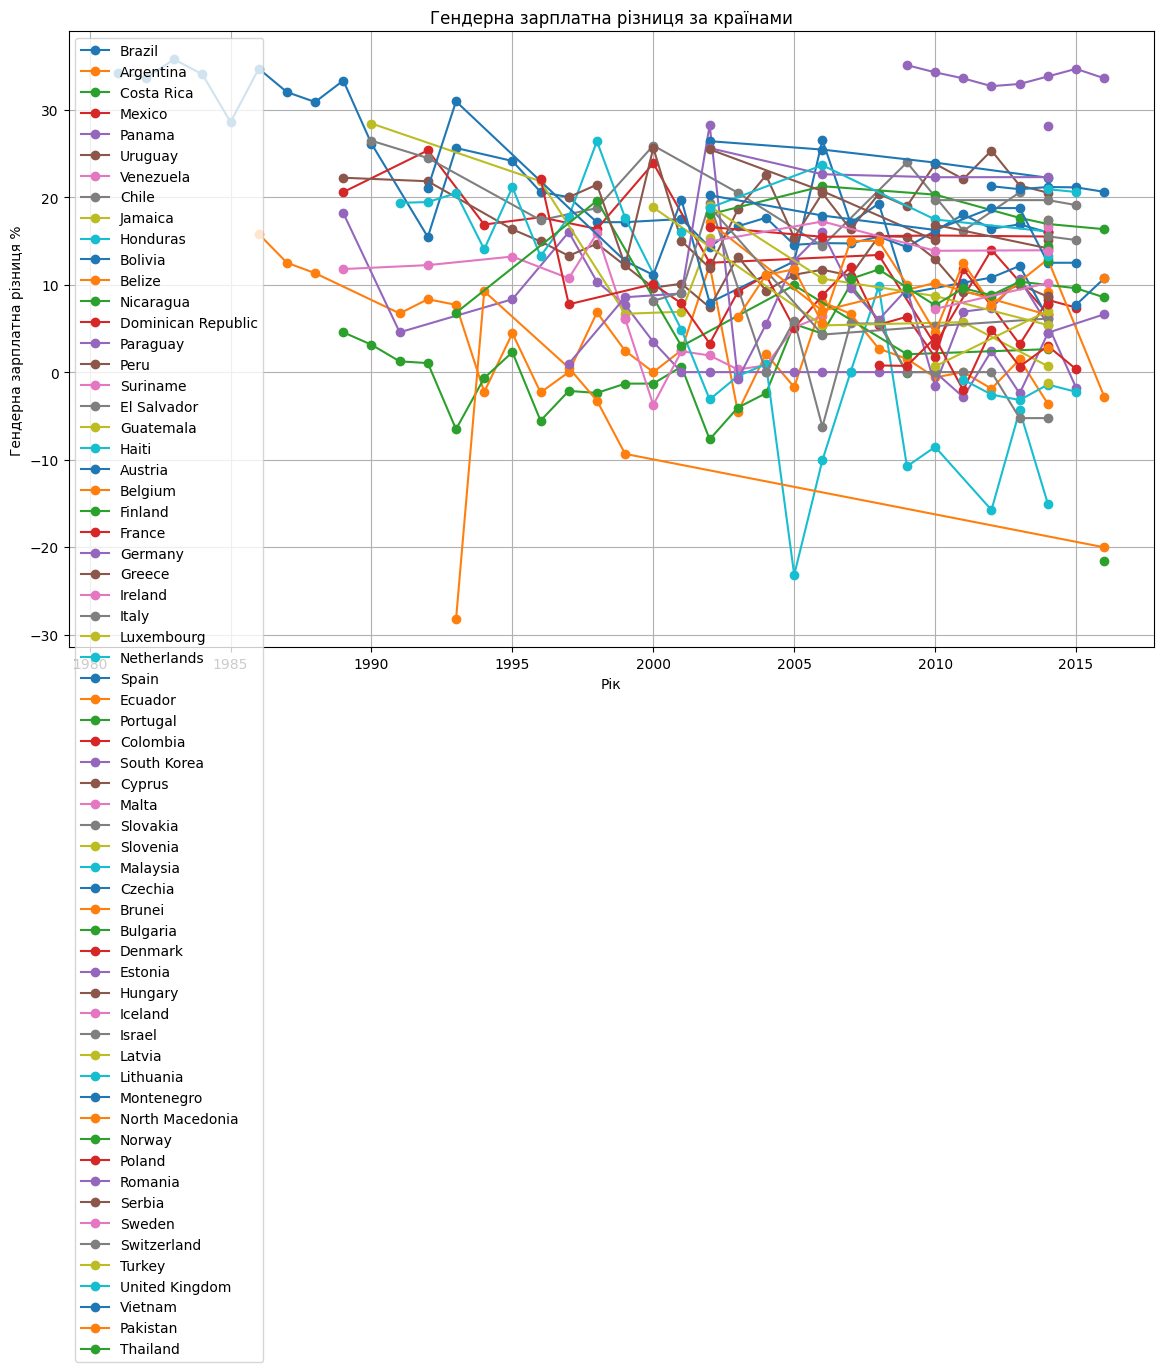

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('gendergapinaverage.csv')
df = pd.DataFrame(data)

X = df[['Year']]
y = df['Gender wage gap %']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.bar(X.squeeze(), y, color='blue', label='Фактичні дані')
plt.plot(X, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('Рік')
plt.ylabel('Гендерна зарплатна різниця %')
plt.title('Лінійна регресія: Гендерна зарплатна різниця за роками')
plt.legend()
plt.show()

countries = data['country'].unique()
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = data[data['country'] == country]
    plt.plot(country_data['Year'], country_data['Gender wage gap %'], marker='o', label=country)
plt.xlabel('Рік')
plt.ylabel('Гендерна зарплатна різниця %')
plt.title('Гендерна зарплатна різниця за країнами')
plt.legend()
plt.grid()
plt.show()


Набір даних з Kaggle: https://www.kaggle.com/datasets/willianoliveiragibin/gender-economic-inequality/

<b>(Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).</b>

   Feature 1  Feature 2  Target
0   0.496714  -0.138264       0
1   0.647689   1.523030       0
2  -0.234153  -0.234137       0
3   1.579213   0.767435       0
4  -0.469474   0.542560       0


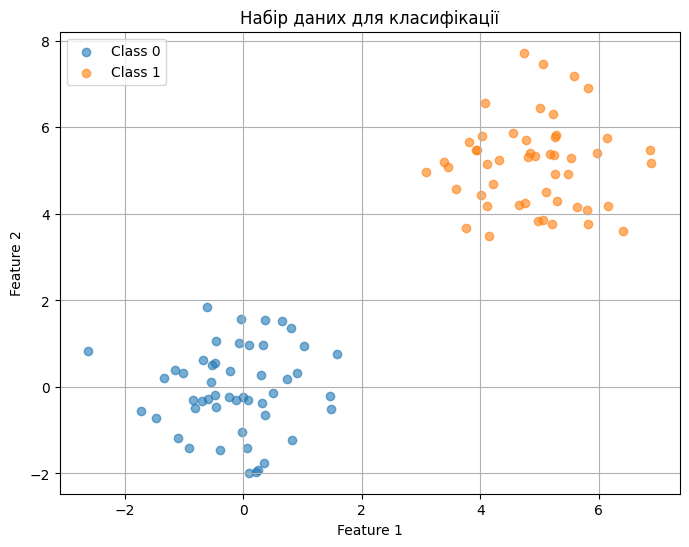

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 100

X_0 = np.random.normal(loc=0, scale=1, size=(num_samples // 2, 2))

X_1 = np.random.normal(loc=5, scale=1, size=(num_samples // 2, 2))

X = np.vstack((X_0, X_1))
y = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))

data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y

print(data.head())

plt.figure(figsize=(8, 6))
plt.scatter(data[data['Target'] == 0]['Feature 1'], data[data['Target'] == 0]['Feature 2'], label='Class 0', alpha=0.6)
plt.scatter(data[data['Target'] == 1]['Feature 1'], data[data['Target'] == 1]['Feature 2'], label='Class 1', alpha=0.6)
plt.title('Набір даних для класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()